In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge

sns.set()

In [11]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [12]:
#Chequeamos la descripción de la data
print(california_housing['DESCR'])


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
#Inspeccionamos los primeras filas del dataframe
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
# Exploramos los estadísticos básicos
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [15]:
# Evaluamos el tipo de datos del dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Todas las variables son del tipo flotante

In [16]:
#Inspeccionamos si existen valores nulos
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Se puede evidenciar de esta instrucción que no  existen valores nulos para ninguna de las variables

## Consigna 1 

Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

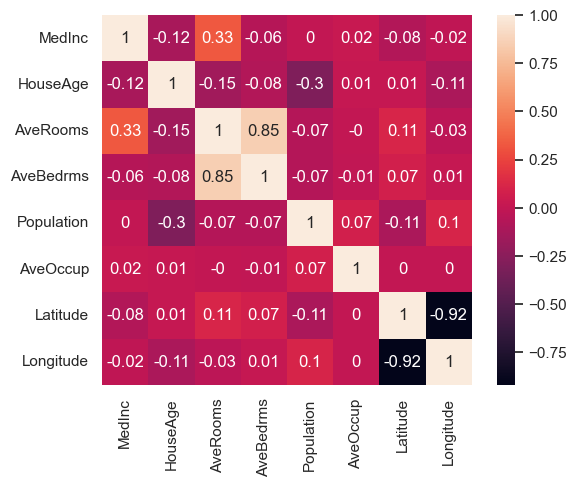

In [17]:
correlacion=X.corr().round(2)
sns.heatmap(correlacion, annot=True, square=True)
plt.show()

Las variables mas correlacionados son:

   * (**Longtitude**, **Latitude**) con coeficiente de correlación **0,92** (-)
   * (**AveBdrms**, **AveRooms**) con coeficien de correlación **0.85**
   * (**MedInc**, **AveRooms**) con coeficiente de correlación **0.33**


Para hallar cuáles son las variables más relacionadas con las variable objetivo, usamos la instrucción **corrwith**

In [67]:
correlacion_con_target = X.corrwith(y).round(2)
correlacion_con_target.sort_values(ascending=False)[:3]

MedInc      0.69
AveRooms    0.15
HouseAge    0.11
dtype: float64

Las tres variables con mayor correlación con el target son: **MedInc**, **AveRooms** y **HouseAge**

De donde se desprende que existe una correlación significativa entre el ingreso medio por bloques y el valor de las casas.

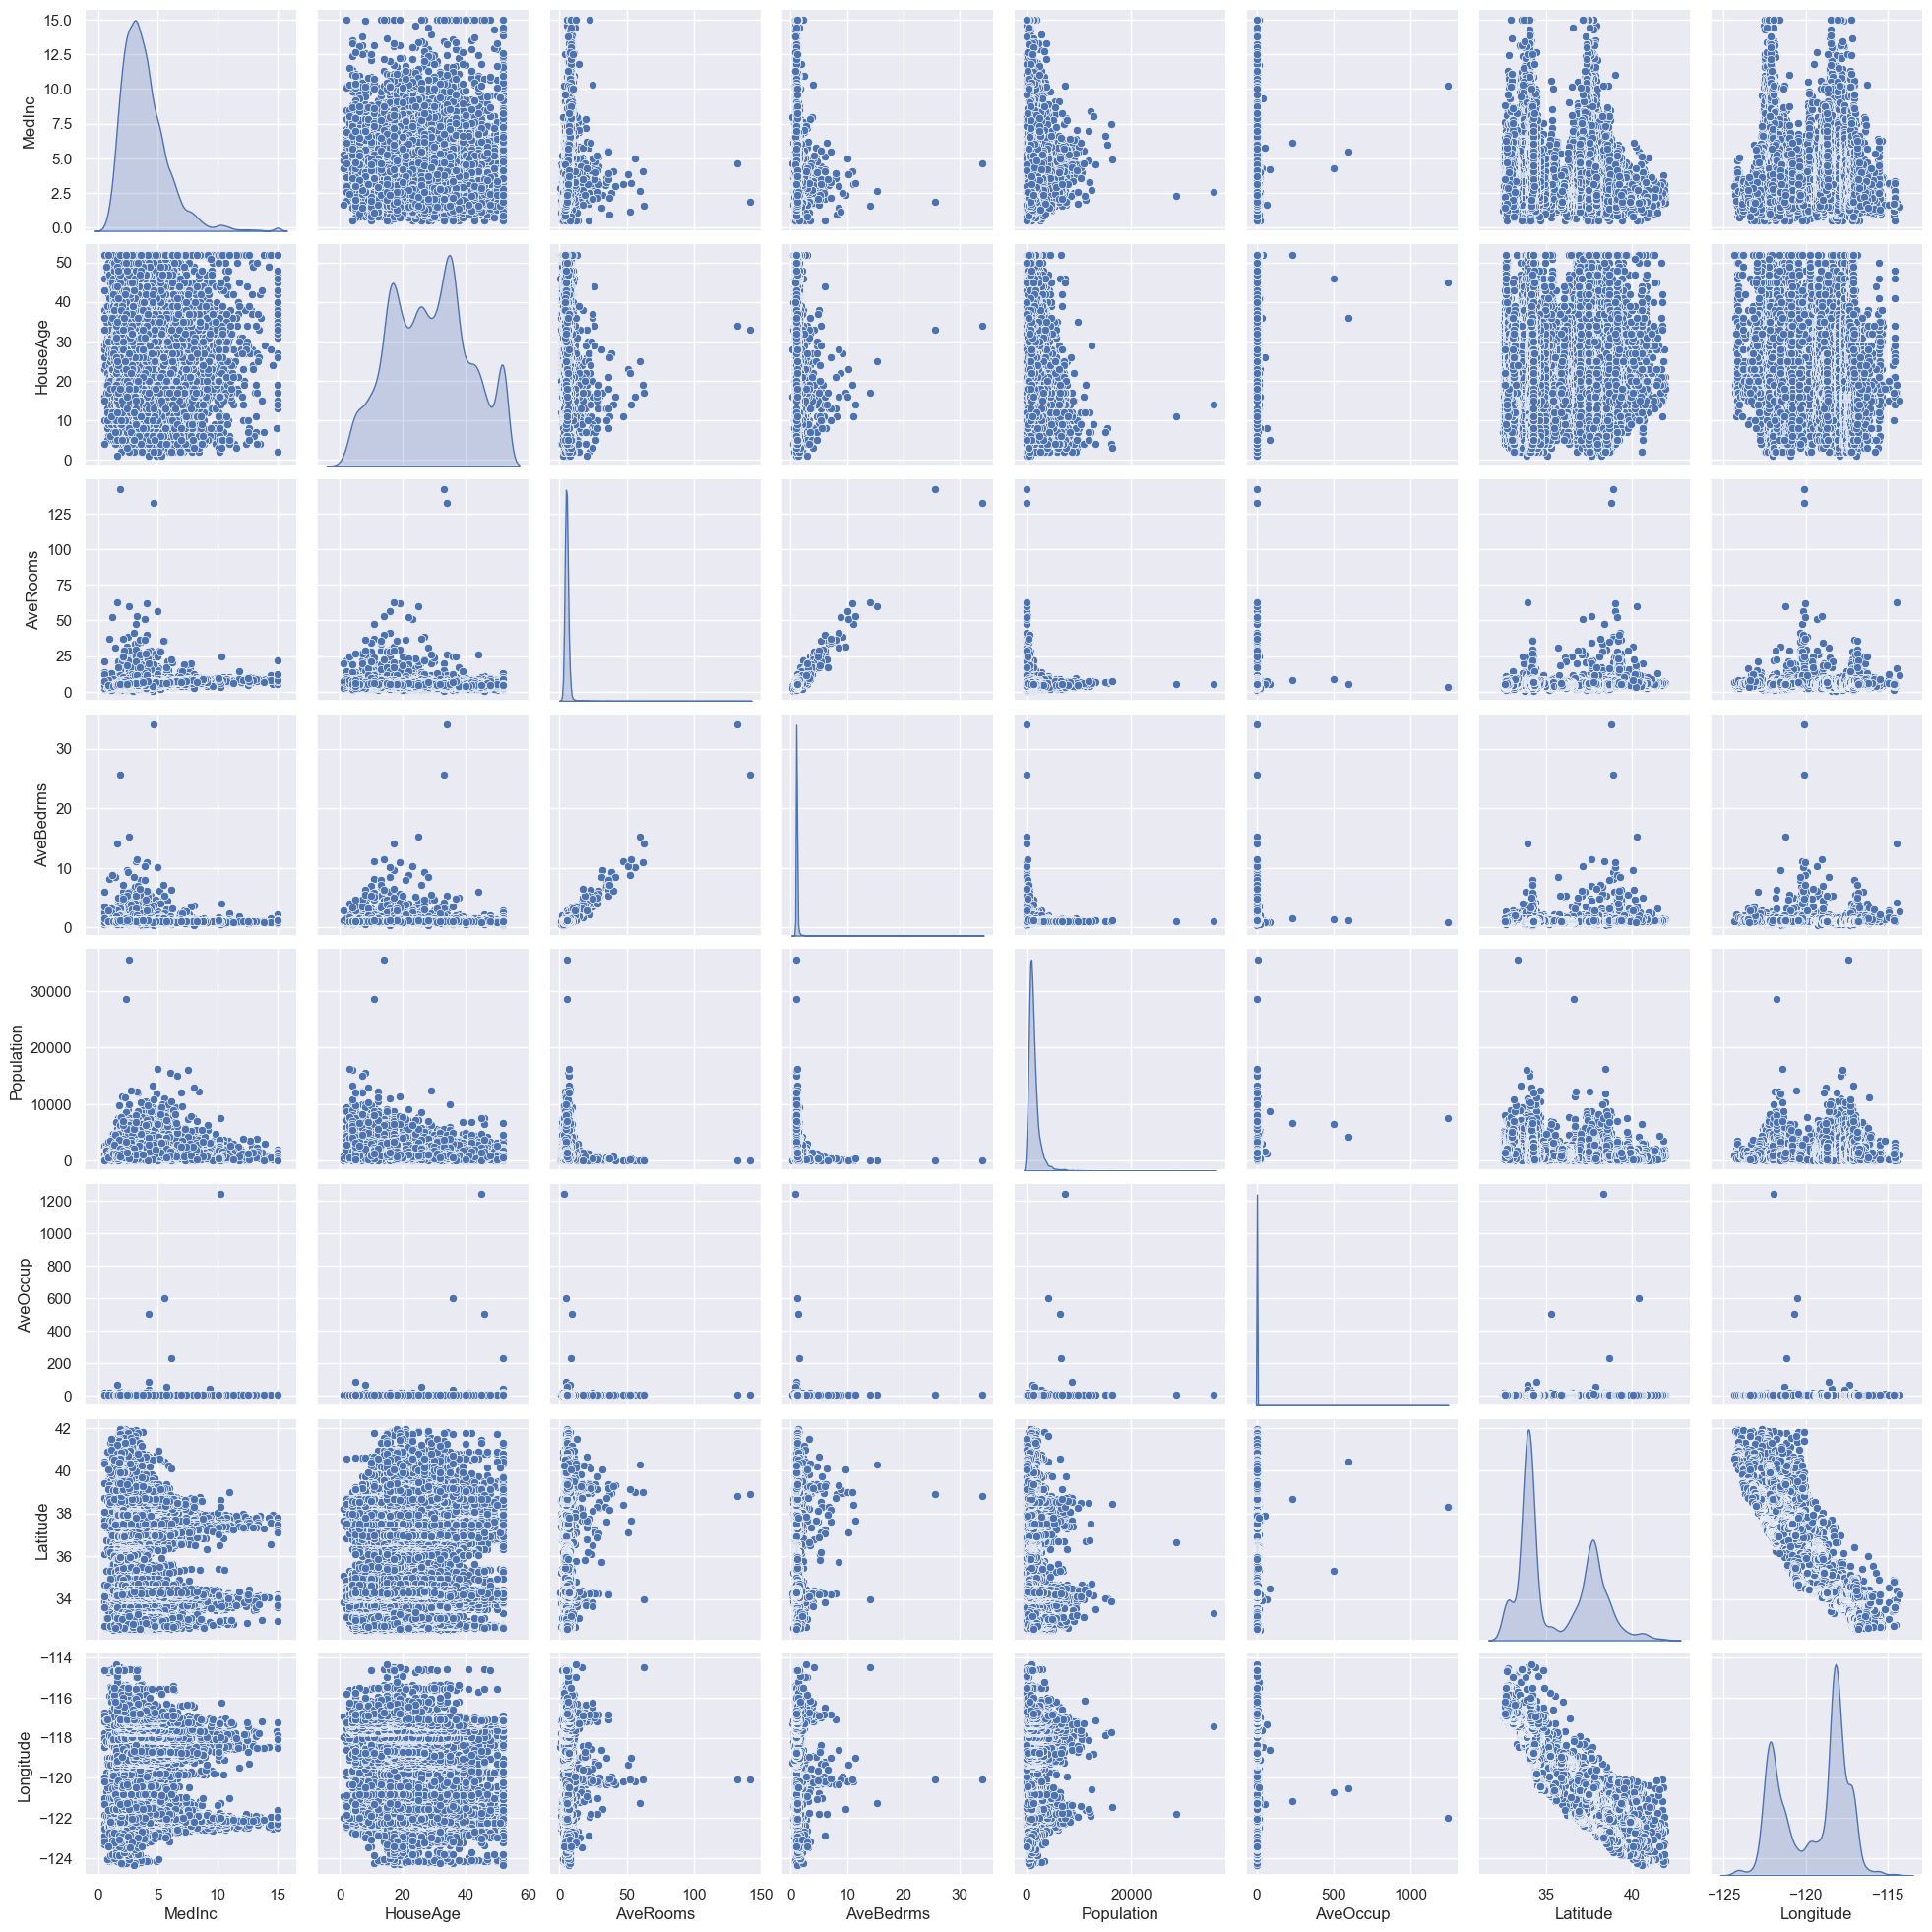

In [21]:
sns.pairplot(X, diag_kind="kde")

## Consigna 2

Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

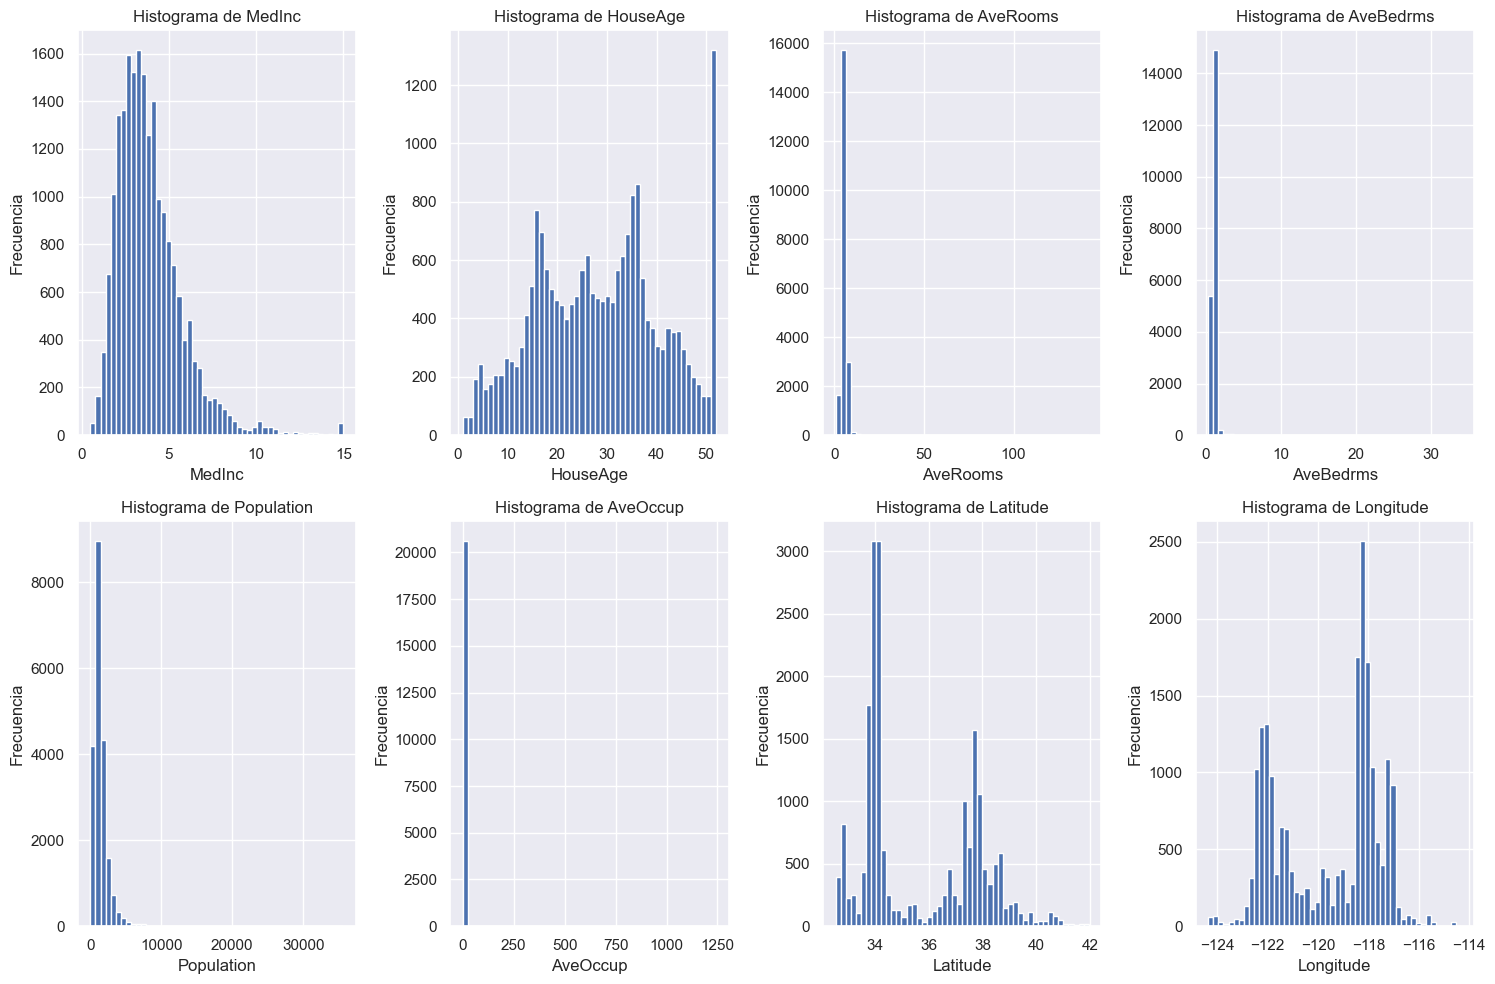

In [36]:
variables = [nombre for nombre in X.columns]

fig, axes = plt.subplots(2, 4, figsize=(15,10))


for i, variable in enumerate(variables):
    row = i // 4
    col = i % 4
    filtrado = X[variable]
    axes[row, col].hist(filtrado, bins=50)
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].set_title(f'Histograma de {variable}')
    
plt.tight_layout()

plt.show()

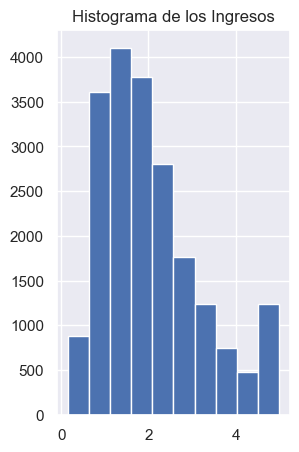

In [30]:
#Histograma para la variable target
plt.figure(figsize=(3,5))

y.hist()
plt.title('Histograma de los Ingresos')

plt.show()

Las variables **MedInc**, **HouseAge** y **target** sus histogramas lucen en cierto grado como Gausianas.


La renta mediana es una distribución con una cola larga. Por lo que el salario de las personas se distribuye más o menos normalmente, con la presencia de algunas personas que reciben un salario alto.

En cuanto a la edad media de la vivienda, la distribución es más o menos uniforme.

La distribución objetivo también tiene una cola larga y una cierta normalidad. 



## Consigna 3

Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=42)


# Datos de train y de test
print('"""""""""""""""""""""""""""""""""""""""""""""""')
print('"""""""""Análisis de los Datos"""""""""""""""""')

print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

print('"""""""""""""""""""""""""""""""""""""""""""""""')
print('"""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""
"""""""""Análisis de los Datos"""""""""
Dimension de X_train: (14448, 8)
Valores de y_train: 14448
Dimension de X_test: (6192, 8)
Valores de y_test: 6192
"""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""


In [43]:
sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)

print(f"Las medias del escalador es {sc_X.mean_}")


Las medias del escalador es [ 3.87689155e+00  2.85753738e+01  5.43812463e+00  1.09803314e+00
  1.42792733e+03  3.11923650e+00  3.56506693e+01 -1.19584102e+02]


In [44]:
# Escalemos el set de testeo
X_test_scaled = sc_X.transform(X_test)

Llamamos al método **LinearRegression()**

In [45]:
regresion = LinearRegression()

Entrenamos el modelo con los datos de entrenamiento (escalados)

In [46]:
regresion.fit(X_train_scaled, y_train)

LinearRegression()

Imprimimos los valores calculados por el modelo

In [35]:
print(f"El valor de la interseccion de la recta será {regresion.intercept_ }")
#print(f"Los valores de los coeficientes de la recta serán {regresion.coef_ }")
for i,name in enumerate(california_housing.feature_names):
    print(f'{name:>10}: {regresion.coef_[i]}')

El valor de la interseccion de la recta será 2.069239608942295
    MedInc: 0.8492217601003744
  HouseAge: 0.1221193090646216
  AveRooms: -0.2995584494086863
 AveBedrms: 0.3484096731563652
Population: -0.0008844881340280431
  AveOccup: -0.041698038778491875
  Latitude: -0.8938556494746361
 Longitude: -0.868616688061255


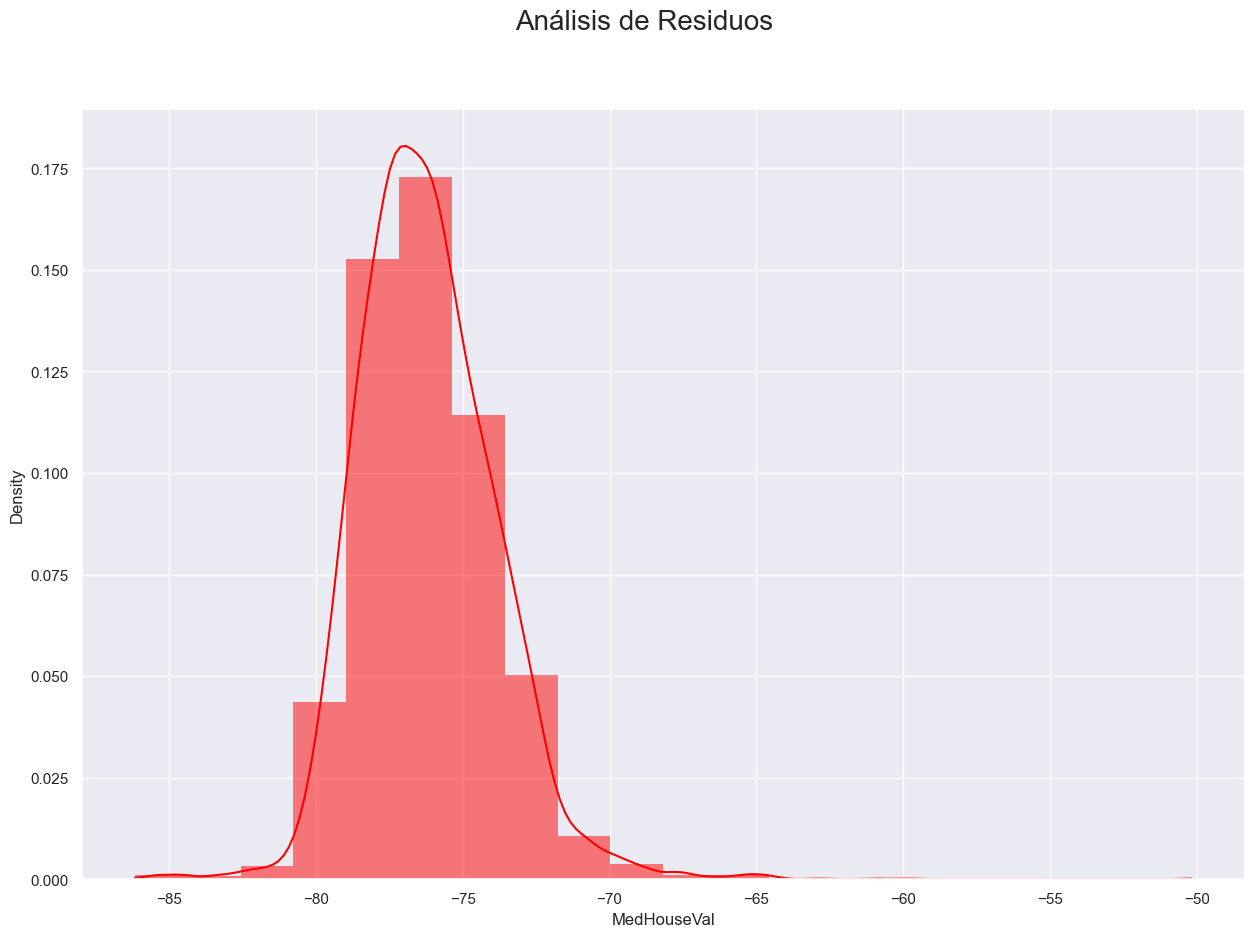

In [48]:
predicciones = regresion.predict(X=X_test)
predicciones = predicciones.flatten()

fig = plt.figure(figsize=(15,10))

sns.histplot((y_test-predicciones.reshape(y_test.shape)), color='red', kde=True, stat='density', linewidth=0, bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

Los residuos se distribuyen normalmente

In [52]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train_scaled))**2))/(y_train.size-9))
print(f"El desvío estándar del modelo {std_dev_model}")

El desvío estándar del modelo 0.7236600333345641


In [53]:
print(f"Desvío estándar del label {np.std(y_train)}")

Desvío estándar del label 1.157452365098422


## Consigna 4

Calcular las métricas de MSE, MAE y  $R^2$ del set de evaluación.

In [51]:
y_pred = regresion.predict(X_test_scaled)

In [57]:

metricas = {"r2": r2_score(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred), 
            "mae":mean_absolute_error(y_test, y_pred)}

metricas_df = pd.DataFrame(metricas, index=[0])
metricas_df

,r2,mse,mae
0,0.59577,0.530568,0.527247


## Consigna 5

Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de $\alpha$
, buscando entre [0,12.5]. Graficar el valor de MSE versus $\alpha$ 
.

In [49]:
alphas = np.linspace(0,12.5,100)
mse_scores = []
ridge_params = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(scores.mean()*-1)
    ridge_params.append(ridge.get_params())



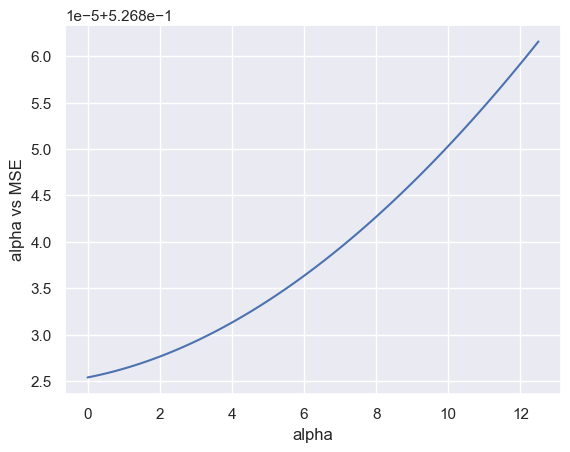

In [50]:
#Grafica los resultados
plt.plot(alphas, mse_scores)
plt.xlabel('alpha')
plt.ylabel('alpha vs MSE')
plt.grid(True)
plt.show()

## Consigna 6
Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [57]:
resultados_ridge = pd.DataFrame({'alpha':alphas,'mse':mse_scores})
comparacion = pd.DataFrame(resultados_ridge)
comparacion.head(10)

,alpha,mse
0,0.000000,0.526825
1,0.126263,0.526825
2,0.252525,0.526826
3,0.378788,0.526826
4,0.505051,0.526826
5,0.631313,0.526826
6,0.757576,0.526826
7,0.883838,0.526826
8,1.010101,0.526826
9,1.136364,0.526826


El mejor ajuste para este modelo se da para el $\alpha$=0.126263 con un **mse**=0.526825

Para el caso de la regresión lineal el valor del ***mse**= 0.530568

De donde la regresión Ridge da un mejor valor del **mse**

La regresion ridge puede estar obteniendo mejor resultado considerando que hay variables altamente correlacionadas.
